# Basic Mapping Skills with Python

## Maps

Maps are visual representations of geographic or spatial information. They are used to display the physical features of an area, such as terrain, bodies of water, and landmarks, as well as human-made features like roads, buildings, and cities. Maps can be created at a range of scales, from small-scale world maps that show the entire planet, to large-scale maps that show detailed information about a single city block.

In addition to traditional maps that display physical features, there are also thematic maps that display specific types of data, such as population density, climate, or political boundaries. These maps use different colors, symbols, and shading to display the data, and are useful for understanding patterns and trends in the data.


Map data, also known as spatial data, is typically stored in a geographic information system (GIS) or a database with spatial capabilities. This allows the data to be analyzed and visualized in a spatial context, which can provide insights and information that might not be apparent in a non-spatial format. There are a number of types of files in which spatial data can be stored such as geojson, shape, and kml. Spatial data can also simply be stored in CSV files but will lack much of the functionality of other file formats.

This guide will go over how to make maps with Python using different file types. We will focus on two of the more common types of maps, choropleth, and proportional dot maps.

## Creating Maps from CSVs with Plotly

For the first two maps, we will be using data from a csv cotaining data on Covid 19 deaths in the United States. To get started, go ahead and import the modules below. As a disclaimer, this guide assumes you are using Anaconda. If you are not, you may need to install these modules with the 'pip install' command. If you need extra help with this step, consult Python's <a href = "https://packaging.python.org/en/latest/tutorials/installing-packages/">guide</a> on this topic.

In [60]:
import pandas as pd
import plotly
import plotly.express as px

Start by reading the CSV into a variable using the pandas read_csv function. This will put everything into a dataframe object. The first row will be automatically read in as headers unless specified not to. Make sure to look through the data to get a feel for how everything is laid out and see columns that could be used to create a map.

In [239]:
data = pd.read_csv(r'C:\Users\celes\Documents\Data\united_states_covid19_cases_deaths_and_testing_by_state.csv')

data.head()

,Code,State/Territory,Total Cases,New Cases in Past Week,Case Rate per 100000,Total Deaths,New Deaths in Past Week,Death Rate per 100000,Weekly Cases Rate per 100000,Weekly Death Rate per 100000,Total % Positive,% Positive Last 30 Days,% Positive Last 7 Days,# Tests per 100K,Total # Tests,# Tests per 100K Last 7 Days,Total # Tests Last 7 Days,# Tests per 100K Last 30 Days,Total # Tests Last 30 Days
0,AL,Alabama,1627670,9820,33196,20892,10,426,200.3,0.2,10-14.9%,10-14.9%,10-14.9%,182992.5722,9006038.0,798.19,39283.0,3324.41,163612.0
1,AK,Alaska,291752,692,39882,1436,0,196,94.6,0.0,8-9.9%,15-19.9%,15-19.9%,648596.4730,4742265.0,686.86,5022.0,3147.47,23013.0
2,AZ,Arizona,2404386,3099,33033,32936,54,452,42.6,0.7,10-14.9%,8-9.9%,8-9.9%,216526.7582,16069319.0,238.70,17715.0,1189.90,88307.0
3,AR,Arkansas,998837,1947,33098,12905,40,427,64.5,1.3,10-14.9%,10-14.9%,8-9.9%,176011.8884,5334079.0,237.15,7187.0,1251.01,37912.0
4,CA,California,12023397,27118,30430,99695,294,252,68.6,0.7,NaN,NaN,NaN,430497.1708,169478462.0,981.87,386543.0,4650.75,1830909.0


The first map we will make is a choropleth map. A choropleth map is a type of thematic map that displays data using different shades or colors to represent values for different regions. These regions can be countries, states, counties, or any other type of geographic region. They are commonly used to display data such as population density, per-capita income, or voting patterns. The values for each region are typically represented by a color scale, with higher values shown in darker colors and lower values shown in lighter colors.

To make a choropleth you will need to use the choropleth() function in Plotly express. Set the locations parameter to the column with the region names or codes, and the color parameter to the column with the values you want to visualize. For this example, we will use "Code" for locations and "Total Deaths" for color. The parameter locationmode controls the set of locations used to match entries in locations to regions on the map. You can choose one of three options: ‘ISO-3’, ‘USA-states’, or ‘country names.’ For this example, we will use 'USA-states.' We will also need to set the scope to 'usa'. See what happens when you delete either of these last two parameters from the code. For color_continuous_scale, we will use 'viridis.' However, use whatever color scale you like.

You also will want to update the margin with update_layout() and update the margin dictionary with values that will make the map easier to view. The keys in the dictionary are "r" for right, "l" for left, "t" for top, and "b" for bottom.

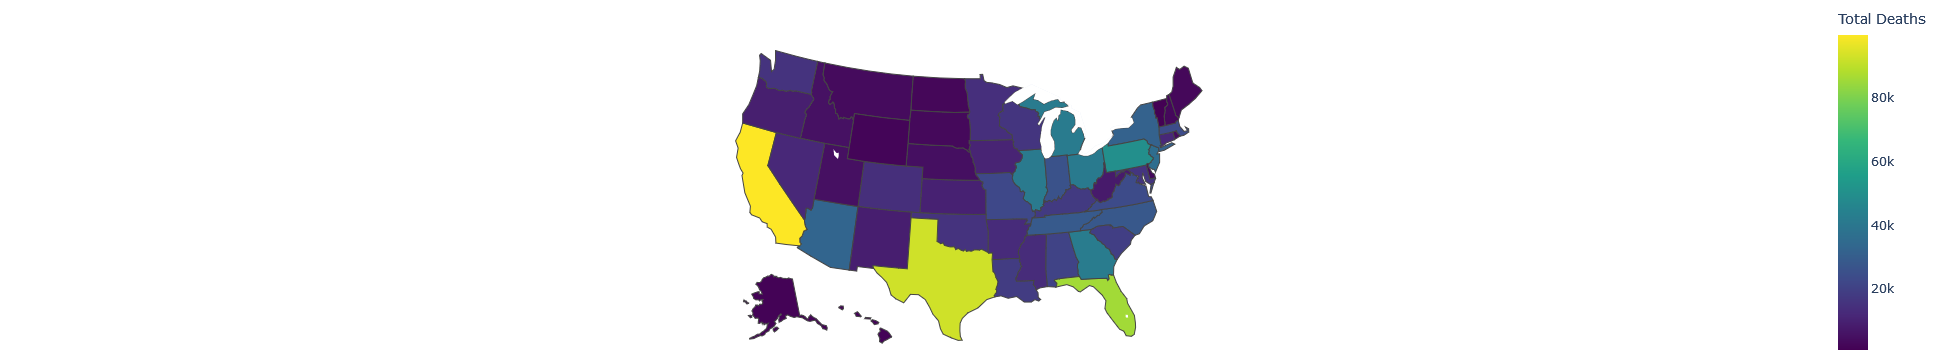

In [251]:
fig = px.choropleth(data, locations="Code",
                    color="Total Deaths",
                    hover_name="State/Territory",
                    color_continuous_scale='viridis',
                    locationmode= 'USA-states',
                    scope ='usa')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

The next map will be the proportional dot map. The proportional dot map is a type of thematic map that displays data using dots of varying sizes to represent values for different regions. Similar to a choropleth map, proportional dot maps can be used to display data such as population density, per-capita income, or voting patterns. However, instead of shading regions to represent values, proportional dot maps use individual dots to represent a set number of cases or occurrences for each region.

In a proportional dot map, each dot represents a fixed number of cases or occurrences, such as 10 or 100. The size of the dots is proportional to the total number of cases or occurrences for the region. For example, a region with 1,000 cases might be represented by 100 dots, while a region with 10,000 cases might be represented by 1,000 dots.

Proportional dot maps can be a useful tool for visualizing spatial patterns and trends, particularly when the data being displayed is highly clustered or concentrated in certain regions. They can also be used to display data for regions that are irregular in shape, such as cities or towns.

The proportional dot map can be made largely the same as the choropleth map. This time though, use the scatter_geo() function instead of choropleth(). The parameters are largely the same. However, scatter_geo color represents the dots on the map rather than the color of the region.

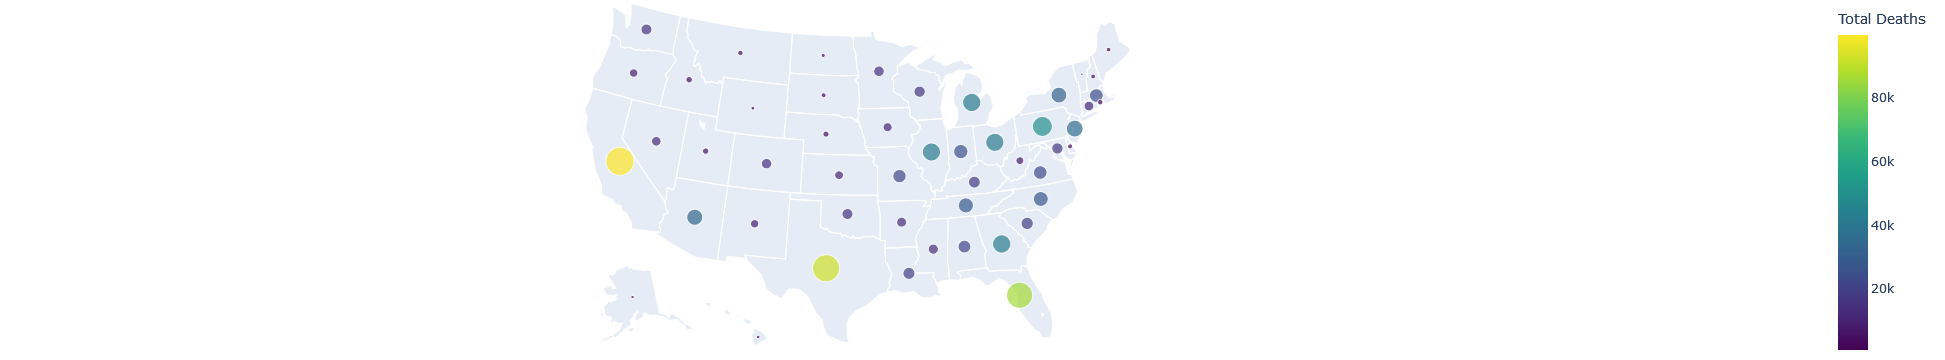

In [254]:
fig = px.scatter_geo(data, locations="Code",
                    color="Total Deaths",
                    hover_name="State/Territory",size="Total Deaths",
                    color_continuous_scale='viridis',
                    locationmode= 'USA-states',
                    scope ='usa') 
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Why are CSV files not used as often for spatial data?

CSV (Comma Separated Values) files are not as good for spatial data because they lack the additional information that is needed to accurately represent geographic features and their relationships to one another. CSV files are simply text files with rows and columns of data, and they do not have any built-in spatial reference information or the ability to store geometric data.

Spatial data, on the other hand, is complex and requires additional information to be properly represented. Spatial data often includes geographic coordinates (such as latitude and longitude) and topological relationships between geographic features (such as adjacency or containment). To store this information and accurately represent spatial data, specialized file formats are needed.

One common file format for spatial data is the shapefile format, which is commonly used in GIS (geographic information system) software. Shapefiles store not only the geographic coordinates of features, but also information about the shape, size, and attributes of those features. This makes them better suited for spatial analysis and visualization than CSV files.

In addition, there are other file formats designed specifically for spatial data, such as GeoJSON and KML, which also include spatial reference information and the ability to store geometric data. These file formats are more versatile and provide more functionality for spatial data analysis and visualization than CSV files.

## Geopandas

Geopandas is a Python library that provides tools for working with geospatial data in a tabular format. It is built on top of pandas and extends its functionality to include spatial data analysis. It provides a set of tools for working with vector data (e.g., points, lines, polygons) and includes functions for spatial operations such as spatial joins, buffering, and distance calculations. Geopandas uses the shapely library for handling geometric objects, and also includes support for reading and writing spatial data in various file formats. With geopandas, you can read, write, and manipulate vector data in a variety of formats, including shapefiles, GeoJSON, and others.

Geopandas provides a simple and efficient way to perform common spatial data operations, such as spatial joins, spatial buffering, and spatial overlays. It also supports advanced data analysis techniques, such as clustering and machine learning on spatial data.

Some of the key features of geopandas include:
<ul>
    <li>Reading and writing of spatial data formats</li>
    <li>Simple and efficient spatial data manipulation</li>
    <li>Support for a wide range of coordinate reference systems (CRS)</li>
    <li>Integration with popular data analysis libraries, such as numpy, scipy, and matplotlib</li>
    <li>Support for advanced spatial analysis techniques, such as kriging, clustering, and machine learning</li>
</ul>

As you go through this exercise, if you have experience with pandas, you will find geopandas and spatial files largely operate in the same way as pandas does with tabular data but with extra functionality.

If you do not have geopandas already installed you will need to install it. It does not automatically come built in with Anaconda. You will also need to install the descartes package to be able to plot polygons with geopandas. In the Anaconda command prompt, use the commented commands below to install the packages. If you are not using Anaconda, just use 'pip install _______' in your command prompt.

In [3]:
# conda install geopandas
# conda install -c conda-forge descartes

Once installed go ahead and import matplotlib.pyplot and geopandas.

In [162]:
import matplotlib.pyplot as plt
import geopandas

## Coordinate Reference Systems (CRS)

A Coordinate Reference System (CRS) is a system that is used to define the positions of geographic features on the Earth's surface. A CRS is based on a set of coordinates that specify a location in space, and a set of rules for interpreting those coordinates in terms of latitude, longitude, and elevation.

Many different CRSs are used in spatial data analysis and visualization, each with its own set of rules and conventions. The most commonly used CRSs are based on the WGS84 datum, which is a global standard for defining geographic coordinates.

The choice of CRS can have a significant impact on the accuracy and reliability of spatial data analysis and visualization. Different CRSs are used for different purposes, depending on factors such as the scale of the data, the geographic extent of the data, and the specific analysis or visualization task.

Some common types of CRSs include:

<ul>
    <li>Geographic CRSs: These are based on a spherical or ellipsoidal model of the Earth's surface, and are used to define positions on the Earth's surface in terms of latitude and longitude.</li>
    <li>Projected CRSs: These are based on a two-dimensional map projection of the Earth's surface, and are used to represent geographic features on a flat surface. Projected CRSs are commonly used for creating maps and visualizations.</li>
    <li>Local CRSs: These are used for defining positions relative to a specific location or area of interest, such as a building or a city block. Local CRSs are often used in urban planning and engineering applications.</li>
    
</ul>

Go ahead and create a variable equal to geopandas.readfile() equal to your file. Use the CRS function to learn more about our dataset. There is a lot of important information we can find on the CRS, axis, area of use, and datum. For this excercise, we will be using a simple shape file to explore the cartographic boundaries of the United States from the <a href= 'https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html'>US Census Bureau</a>.

In [252]:
states = geopandas.read_file(r'C:\Users\celes\Jupyter Notebooks\Data\cb_2018_us_state_500k.shp')
states.crs



<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Currently, the dataset is using the CRS EPSG:4269. For this exercise, we are going to change the CRS of this data to EPSG: 3395 using the to_crs() function. This will present our maps better on our screen. When we are creating our maps try switching back to EPSG: 4269 and see how it changes the view of the map. Use the crs function to see how the data has changed by changing the CRS.

In [180]:
states = states.to_crs("EPSG:3395")
states.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - between 80°S and 84°N
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Print out the head of the file and observe the data. Specifically, take a closer look at the geometry column. Notice how it does not just describe the location but also the shape. Spatial files such as shp and geojson have these specifications so when creating maps we will not only be able to plot the correct location but the correct shape as well. There are only three types of shapes geometry can fall under in spatial files: polygons, points, and multipolygons.

In [179]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


Now let's go ahead and plot our map using the plot() function. Adjust the figure size to whatever you prefer. We will adjust the x and y limits by setting variables equal to the minimum and maximum bounds of the x and y axes of our data. You can then set new limits using set_xlim and set_ylim.

[-19942765.32605051  -1626516.30297928  20012847.74851734
  11487759.99204796]


(-1626516.30297928, 11487759.992047962)

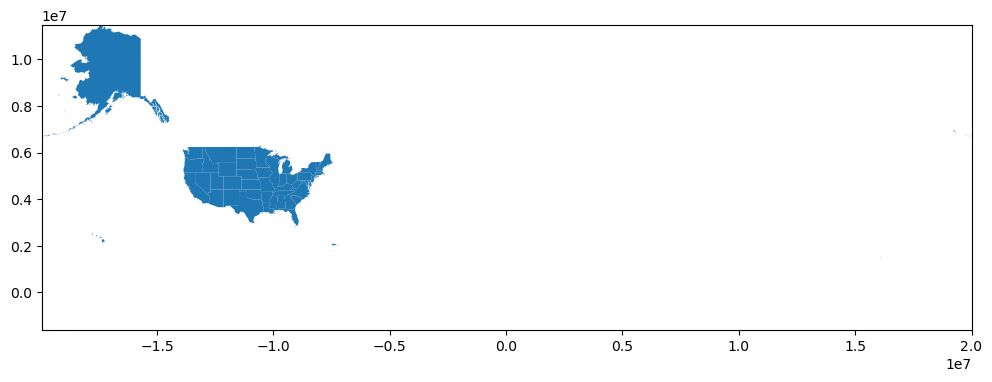

In [181]:
state_map = states.plot(figsize=(12, 12))

minx, miny, maxx, maxy = states.total_bounds
print(states.total_bounds)
state_map.set_xlim(minx, maxx)
state_map.set_ylim(miny, maxy)

Notice how large are map above is? That's because this dataset also includes US territories. Let's focus our map on the 48 mainland states by dropping all non-mainland states and territories from the dataset. You can always print out the dataset to get through to make sure you got them all.

Now go ahead and replot the dataset and see how it changes.

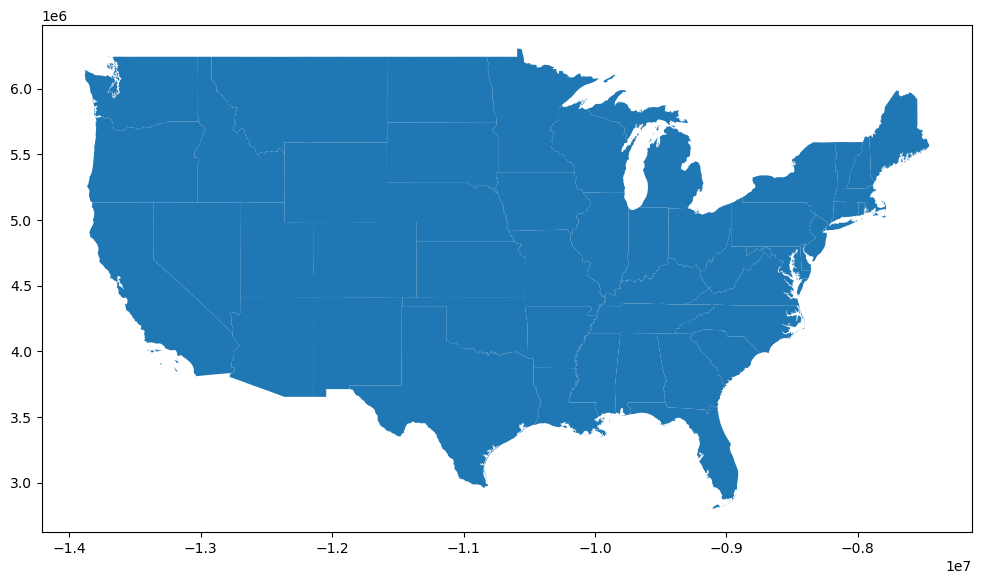

In [174]:
dropped = states[(states["NAME"] == "Hawaii") | (states["NAME"] == "Alaska") | (states["NAME"] == "Guam") | (states["NAME"] == "Commonwealth of the Northern Mariana Islands")
                 | (states["NAME"] == "United States Virgin Islands") | (states["NAME"] == "Puerto Rico") | (states["NAME"] == "American Samoa")].index

states.drop(dropped, inplace=True)
state_map = states.plot(figsize=(12, 12))

If you just want to plot the boundary of your data, you can use ___.boundary.plot().

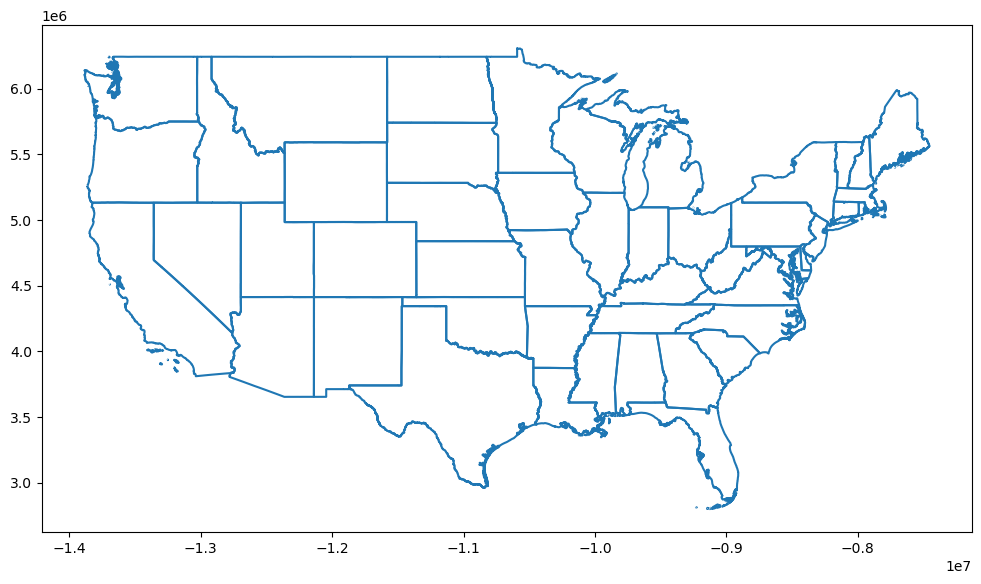

In [173]:

state_map = states.boundary.plot(figsize=(12, 12))


If you just want to plot just one state, you can use a conditional to just plot one state from your dataset.

<AxesSubplot:>

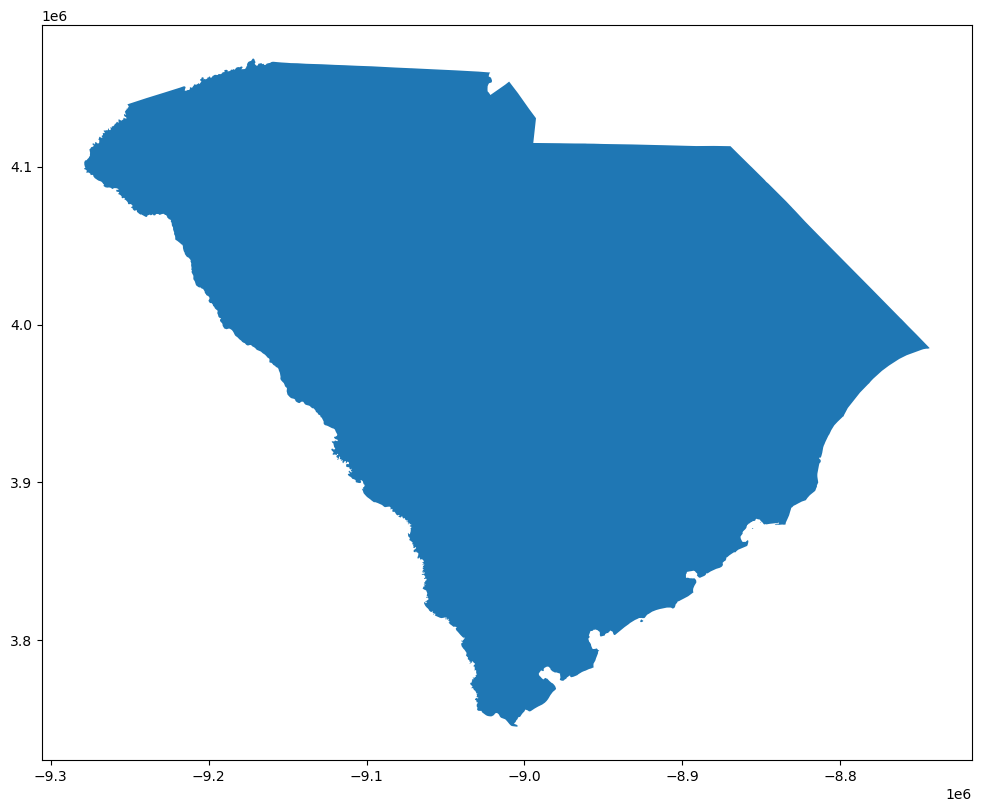

In [168]:
states[states['NAME'] == 'South Carolina'].plot(figsize=(12, 12))

If you want to focus on a specific quadrant of the US, you can create a new dataset using the isin() function to select only states within a specific quadrant. After creating the new dataframe, use plot() to plot a new map of just the quadrant.

<AxesSubplot:>

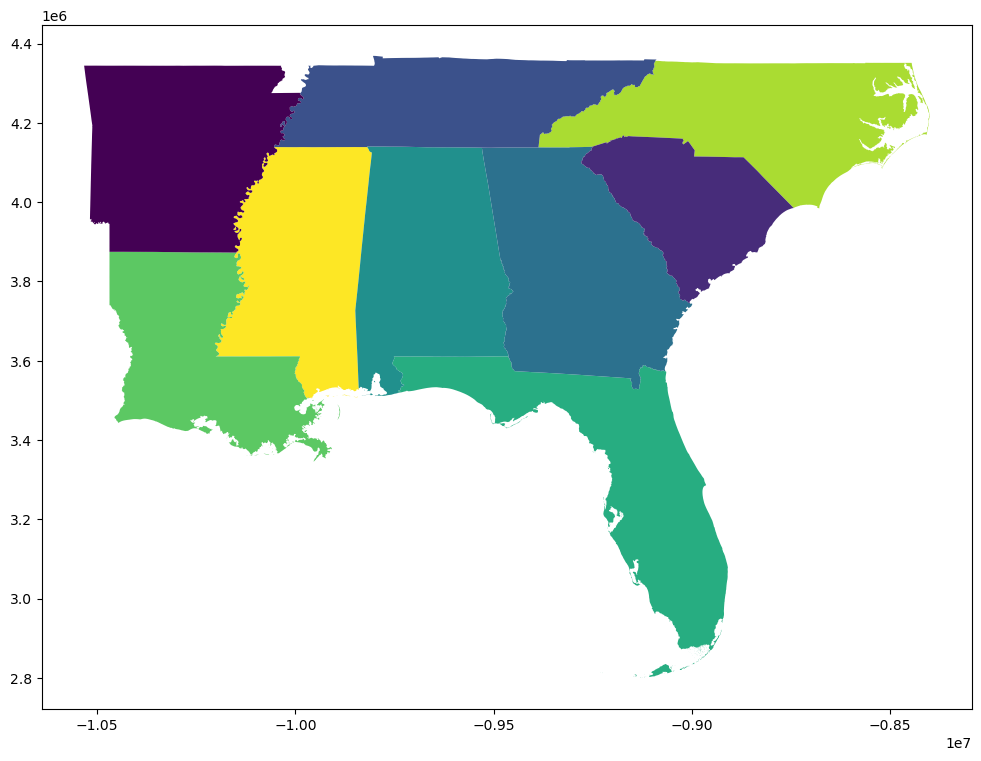

In [169]:
southeast = states[states['STUSPS'].isin(['FL','GA','AL','SC','NC', 'TN', 'AR', 'LA', 'MS'])]
southeast.plot(cmap = "viridis_r", figsize=(12,12))

## Plotting North Carolina Public Schools with Two GeoJson Files

It is important to note that you can use multiple files to create a map. Let's use a practical example to illustrate this. In this example, we will use two geojson files to make one map of North Carolina Public Schools found on <a href= 'https://www.nconemap.gov/explore?collection=Dataset&layout=list'>NC OneMap</a>.

Go ahead and read in the file "Public_Schools.geojson." Go ahead and take a look at the data. Notice anything interesting about it?


In [236]:
nc_public_schools= geopandas.read_file(r'C:\Users\celes\Jupyter Notebooks\Data\Public_Schools.geojson')
nc_public_schools.head()

,objectid,lea_school,ptmoved,comments,reviewed,school_nam,principal,street_lon,phys_addr,phys_city,...,ext_hours,num_teach,bgn_grade,end_grade,pre_k,elem,middle,high,early_coll,geometry
0,1,70310,"yes, 2012",across town,1,B C Ed Tech Center,Willard Bryant,820 North Bridge St,820 North Bridge St,Washington,...,-,9,06,12,,,yes,yes,,POINT (-77.05613 35.55269)
1,2,70340,"yes, 2012",down the street,1,S W Snowden Elementary,Melissa Dana,6921 NC 306 North,693 North 7th Street,Aurora,...,-,15,PK,08,yes,yes,yes,,,POINT (-76.79188 35.30652)
2,3,70326,,,,Chocowinity Primary,Alicia Vosburgh,606 Gray Road,606 Gray Road,Chocowinity,...,-,33,PK,04,yes,yes,,,,POINT (-77.09387 35.49888)
3,4,70308,,point verified,1,Bath Elementary,Pamela Hodges,110 S King Street,110 S King Street,Bath,...,-,39,KG,08,,,yes,,,POINT (-76.81073 35.47580)
4,5,740309,,,,AydenGrifton High,Marty Baker,7653 NC 11 South,7653 NC 11 South,Ayden,...,-,48,09,12,,,,yes,,POINT (-77.43122 35.43017)


Go ahead and plot the data. Notice how all the data is plotted as points? That is because all values in the geometry column are points, not polygons. You can vaguely tell it is NC but it is difficult to see where exactly the schools are located.

<AxesSubplot:>

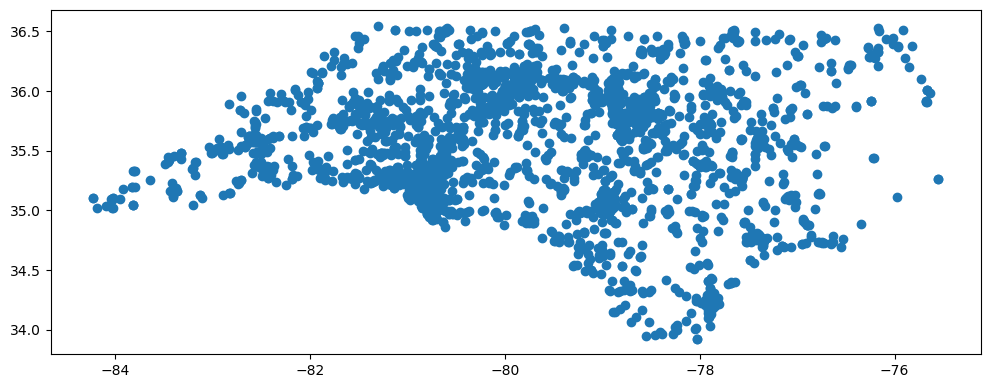

In [204]:
nc_public_schools.plot(figsize=(12,12))

Now let's read in "nc_boundaries.geojson" and look at the data. This time the data is all polygons. However, this dataset contains no information related to schools.

In [241]:
nc_counties = geopandas.read_file(r'C:\Users\celes\Jupyter Notebooks\Data\nc_boundaries.geojson')
nc_counties.head()

,OBJECTID,County,FIPS,Rec_Survey,NCGS_url,ck_date,Shape__Area,Shape__Length,GlobalID,geometry
0,1,Camden,029,Recorded survey data is available. Visit North...,https://ncem-gis.maps.arcgis.com/apps/OnePane/...,2011-11-29 00:00:00+00:00,8.650426e+09,680450.731781,90044997-3e45-4fb9-868b-d63e35ca5417,"POLYGON ((-75.90629 36.08588, -75.90623 36.086..."
1,2,Gates,073,No recent survey data available,,2011-11-29 00:00:00+00:00,9.640705e+09,444604.369559,9481c531-a035-4ef5-b744-7ea6c273dc2f,"POLYGON ((-76.69658 36.29619, -76.69626 36.296..."
2,3,Iredell,097,Recorded survey data is available. Visit North...,https://ncem-gis.maps.arcgis.com/apps/OnePane/...,2011-11-29 00:00:00+00:00,1.667062e+10,639632.141435,af176728-342a-4e27-98c7-a3618a76f75d,"POLYGON ((-80.94812 35.49117, -80.94785 35.490..."
3,4,Wilkes,193,Recorded survey data is available. Visit North...,https://ncem-gis.maps.arcgis.com/apps/OnePane/...,2011-11-29 00:00:00+00:00,2.111175e+10,718209.059123,ff004293-a701-4db2-9992-0746fca95bd3,"POLYGON ((-81.30257 36.00491, -81.30244 36.004..."
4,5,Union,179,Recorded survey data is available. Visit North...,https://ncem-gis.maps.arcgis.com/apps/OnePane/...,2011-11-29 00:00:00+00:00,1.782795e+10,584449.934640,64144070-8f48-4c5f-ac8e-356806056303,"POLYGON ((-80.55036 35.20841, -80.55060 35.208..."


Create a variable equal to the plot of nc_counties. This will serve as the base of our map. Format it to your taste.

Next, create a plot of the NC_Public_Schools data. You will need to you new variable into the ax parameter to serve as an Axes object. This allows what we just plotted to serve as the base of our map. If you want to adjust the markersize based on a variable, simply pass a column in from the dataset and each point will adjust in size according to the data in that column.

<AxesSubplot:>

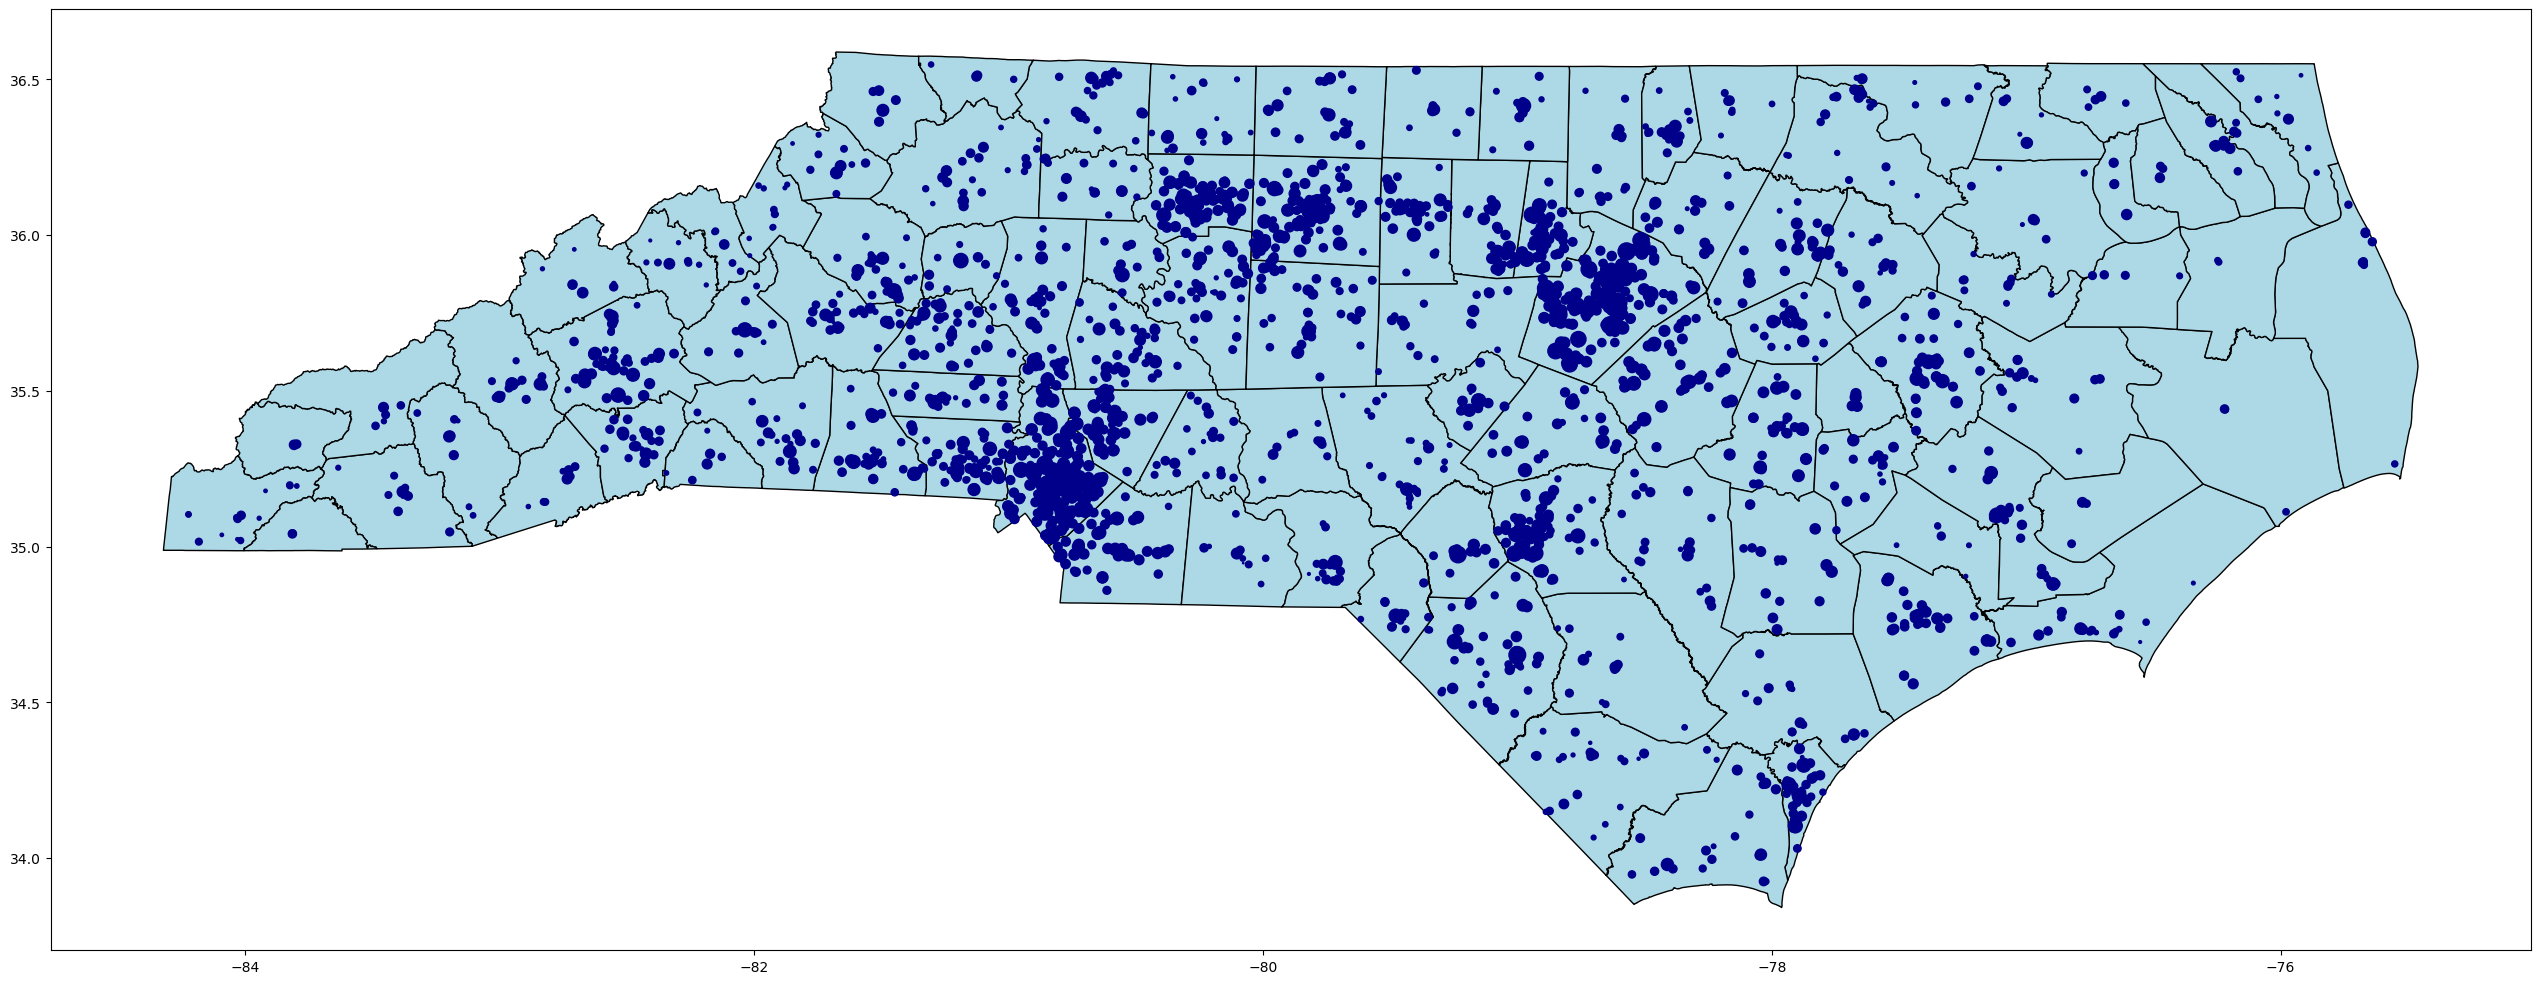

In [260]:
base = nc_counties.plot(color='lightblue', edgecolor='black', figsize=(32,32))

nc_public_schools.plot(ax = base, color='darkblue', markersize=nc_public_schools['num_teach'])